# Import packages

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  
#from sklearn.inspection import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler  
 

# Feature select

In [2]:
df = pd.read_csv("./Data/Mult_data.csv")
df.shape

(132555, 118)

In [3]:
df

,Unnamed: 0,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label,class
0,0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,beigen,0
1,1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,...,0.0,5.319895,344.262695,4.710446,344.262695,2.218830e+01,0.0,0.0,beigen,0
2,2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,...,0.0,6.318264,347.703087,9.034660,347.703087,8.162508e+01,0.0,0.0,beigen,0
3,3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,...,0.0,1.000000,337.000000,0.000000,337.000000,0.000000e+00,0.0,0.0,beigen,0
4,4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,beigen,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132550,9995,153.688534,209.362300,51475.879187,219.858244,242.027262,56787.500904,547.812321,298.195172,60928.481976,...,0.0,8678.383392,554.000000,0.000013,554.000000,1.746230e-10,0.0,0.0,mirai,1
132551,9996,154.645871,211.590861,51906.095775,220.821623,243.440043,56969.089730,548.781903,298.661304,60936.478575,...,0.0,8679.378573,554.000000,0.000013,554.000000,1.746230e-10,0.0,0.0,mirai,1
132552,9997,155.644338,213.790807,52321.045926,221.820309,244.840095,57145.104258,549.780815,299.125742,60944.013909,...,0.0,8680.378401,554.000000,0.000013,554.000000,1.746230e-10,0.0,0.0,mirai,1
132553,9998,154.834365,215.988053,52725.825097,221.268974,246.237308,57316.853508,549.496156,299.589574,60951.108872,...,0.0,8681.175334,554.000000,0.000013,554.000000,1.746230e-10,0.0,0.0,mirai,1


In [3]:
del df['Unnamed: 0']  # 删除'Unnamed: 0'
del df['label']  # 删除'label'

In [4]:
df['class'].value_counts()

1    50000
2    48657
0    33898
Name: class, dtype: int64

In [5]:
df.head(3)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,class
0,1.000000,60.00000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0
1,1.000000,354.00000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,0
2,1.857879,360.45898,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,0


### 使用特征间的PCCs进行谱聚类

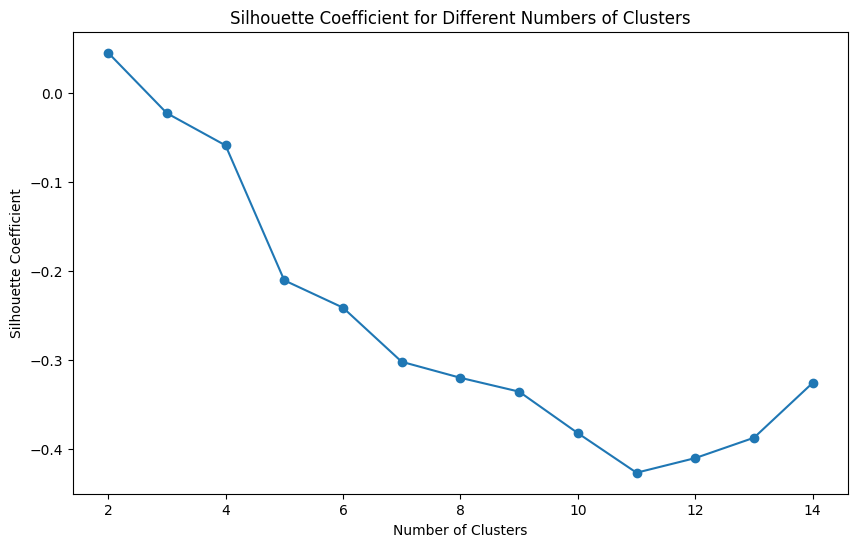

In [20]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


pccs = df.corr()

# 转换PCCs矩阵为相似性矩阵
similarity_matrix = 1 - np.abs(pccs)

# 定义聚类数量范围
cluster_range = range(2, 15)

# 初始化一个列表来存储每个聚类数量的轮廓系数
silhouette_scores = []

# 遍历不同的聚类数量
for n_clusters in cluster_range:
    # 应用谱聚类
    spectral_cluster = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
    cluster_labels = spectral_cluster.fit_predict(similarity_matrix)

    # 计算轮廓系数
    silhouette_avg = silhouette_score(similarity_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 绘制轮廓系数随聚类数量变化的图
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for Different Numbers of Clusters')
plt.show()

In [23]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# 假设df是一个DataFrame，其中包含了您的数据
# 计算皮尔逊相关系数
pccs = df.corr(method='pearson')

# 转换PCCs矩阵为相似性矩阵（使用1减去绝对值的PCCs）
similarity_matrix = 1 - pccs.abs()

# 假设我们想将特征分成k个聚类
k = 11  # 这个值需要根据你的具体数据进行调整

# 应用谱聚类
spectral_clust = SpectralClustering(n_clusters=k, affinity='precomputed')
clusters = spectral_clust.fit_predict(similarity_matrix)

# 计算轮廓系数
silhouette_avg = silhouette_score(similarity_matrix, clusters)
print("Silhouette Coefficient: ", silhouette_avg)

# 创建一个字典来保存每个聚类的特征名称和PCCs分数
clustered_features = {i: [] for i in range(k)}
clustered_pccs = {i: [] for i in range(k)}

# 分配特征和对应的PCCs分数到相应的聚类
for feature, cluster in zip(pccs.columns, clusters):
    clustered_features[cluster].append(feature)
    clustered_pccs[cluster].extend(pccs[feature])

# 打印每个聚类的特征数量和平均PCCs分数
for cluster in clustered_features:
    print("Cluster", cluster, "contains", len(clustered_features[cluster]), "features")
    avg_pccs = sum(clustered_pccs[cluster]) / len(clustered_pccs[cluster])
    print("Average PCCs score for Cluster", cluster, ":", avg_pccs)


Silhouette Coefficient:  -0.426218969442882
Cluster 0 contains 71 features
Average PCCs score for Cluster 0 : 0.17572374850682673
Cluster 1 contains 1 features
Average PCCs score for Cluster 1 : 0.36526834199920993
Cluster 2 contains 2 features
Average PCCs score for Cluster 2 : 0.10944886948921662
Cluster 3 contains 1 features
Average PCCs score for Cluster 3 : 0.3654979806867831
Cluster 4 contains 6 features
Average PCCs score for Cluster 4 : 0.29727407269785683
Cluster 5 contains 2 features
Average PCCs score for Cluster 5 : -0.06470498781368203
Cluster 6 contains 14 features
Average PCCs score for Cluster 6 : 0.284725530194172
Cluster 7 contains 1 features
Average PCCs score for Cluster 7 : -0.09494920864194631
Cluster 8 contains 8 features
Average PCCs score for Cluster 8 : 0.28327326418387677
Cluster 9 contains 9 features
Average PCCs score for Cluster 9 : 0.27191486511195173
Cluster 10 contains 1 features
Average PCCs score for Cluster 10 : -0.10124480308092977


d:\Anaconda\envs\pycharm\lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[2.66216474e-13 6.08155204e-08 2.19889630e-07 3.72778720e-07
 1.89431243e-07 2.91617664e-07 5.10710463e-07 4.41647523e-07
 1.05773905e-06 4.16532059e-07 5.21118115e-07 1.77467109e-06]
not reaching the requested tolerance 1.7285346984863281e-06.
  _, diffusion_map = lobpcg(


### 标准化

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 保存目标列 'class'
target = df['class']

# 选择需要标准化的特征列
features_to_scale = df.drop(columns=['class'])

# 初始化标准化器
scaler = StandardScaler()

# 对特征进行标准化
scaled_features = scaler.fit_transform(features_to_scale)

# 将标准化后的特征转换回DataFrame
df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# 将目标列 'class' 添加回DataFrame
df['class'] = target

df


In [ ]:
from sklearn.cluster import Birch
from scipy.stats import pearsonr
import numpy as np
import pandas as pd



# 假设 'class' 是目标列
target = df['class']
features = df.drop(columns=['class'])

# 计算每个特征与目标变量的皮尔逊相关系数
correlation_scores = []
for col in features.columns:
    corr, _ = pearsonr(features[col], target)
    correlation_scores.append(corr)

# 将相关性分数转换为numpy数组
correlation_array = np.array(correlation_scores).reshape(-1, 1)

# 应用BIRCH聚类
birch = Birch(threshold=0.2, branching_factor=200, n_clusters=5)
clusters = birch.fit_predict(correlation_array)

# 初始化存储每个聚类的特征和平均PCCs分数的字典
clustered_features = {}
for cluster_num in range(max(clusters) + 1):
    # 获取当前聚类的特征
    cluster_indices = np.where(clusters == cluster_num)[0]
    cluster_feature_names = features.columns[cluster_indices]

    # 计算当前聚类的平均PCCs分数
    average_pccs_score = np.mean([correlation_scores[i] for i in cluster_indices])

    # 存储结果
    clustered_features[cluster_num] = {
        'features': list(cluster_feature_names),
        'average_pccs_score': average_pccs_score,
        'number_of_features': len(cluster_feature_names)
    }

# 输出每个聚类包含的特征数量、特征名称及其平均PCCs分数
for cluster_num, info in clustered_features.items():
    print(f"Cluster {cluster_num}: Number of Features: {info['number_of_features']}, Features: {info['features']}, Average PCCs Score: {info['average_pccs_score']}")


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.cluster import Birch, SpectralClustering
from sklearn.tree import DecisionTreeClassifier

target = df['class']
features = df.drop('class', axis=1)

# 步骤1: 计算特征和目标列的皮尔逊相关系数
correlations = np.array([pearsonr(features[col], target)[0] for col in features.columns])

# 步骤2: 使用BIRCH进行初步聚类
birch = Birch(threshold=0.2, branching_factor=200, n_clusters=5)
birch_clusters = birch.fit_predict(correlations.reshape(-1, 1))

# 步骤3: 在每个BIRCH聚类上应用谱聚类进行细致分类
spectral_clusters = np.zeros_like(birch_clusters)
for cluster in np.unique(birch_clusters):
    cluster_indices = np.where(birch_clusters == cluster)[0]
    if len(cluster_indices) > 1:
        spectral = SpectralClustering(n_clusters=11)  # 调整细分聚类数量
        sub_clusters = spectral.fit_predict(correlations[cluster_indices].reshape(-1, 1))
        spectral_clusters[cluster_indices] = sub_clusters + np.max(spectral_clusters) + 1
    else:
        spectral_clusters[cluster_indices] = np.max(spectral_clusters) + 1

# 步骤4: 在每个聚类中使用决策树选择最优特征
selected_features = []
for cluster in np.unique(spectral_clusters):
    cluster_features = features.columns[np.where(spectral_clusters == cluster)[0]]
    if len(cluster_features) > 1:
        dt = DecisionTreeClassifier()
        dt.fit(features[cluster_features], target)
        importances = dt.feature_importances_
        selected_features.append(cluster_features[np.argmax(importances)])
    elif len(cluster_features) == 1:
        selected_features.append(cluster_features[0])

# 输出选择的最优特征
print("Selected features:", selected_features)


### 多分段聚类

In [6]:
from scipy.stats import pearsonr
import pandas as pd

# 假设 'class' 是目标列
target = df['class']
features = df.drop('class', axis=1)

# 计算每个特征与目标变量的皮尔逊相关系数
correlation_scores = {}
for col in features.columns:
    corr, _ = pearsonr(features[col], target)
    correlation_scores[col] = corr

# 输出特征名称和对应的PCCs分数
for feature, score in correlation_scores.items():
    print(f"{feature}: {score}")


MI_dir_L5_weight: 0.37676688839094274
MI_dir_L5_mean: -0.13522020583983801
MI_dir_L5_variance: -0.06563698154224225
MI_dir_L3_weight: 0.38500519974888503
MI_dir_L3_mean: -0.1403880397232436
MI_dir_L3_variance: -0.06876967525877256
MI_dir_L1_weight: 0.3690045234660765
MI_dir_L1_mean: -0.14548860712152348
MI_dir_L1_variance: -0.071580666404888
MI_dir_L0.1_weight: 0.1984876263432653
MI_dir_L0.1_mean: -0.14993334512506634
MI_dir_L0.1_variance: -0.07426200603626473
MI_dir_L0.01_weight: 0.11308576296022661
MI_dir_L0.01_mean: -0.1460830173895747
MI_dir_L0.01_variance: -0.07674586929233007
H_L5_weight: 0.376766888390937
H_L5_mean: -0.13522020583978975
H_L5_variance: -0.06563698154224695
H_L3_weight: 0.38500519974470393
H_L3_mean: -0.14038803967698665
H_L3_variance: -0.06876967526313843
H_L1_weight: 0.36900452195146893
H_L1_mean: -0.14548856116239783
H_L1_variance: -0.07158067040665518
H_L0.1_weight: 0.198487614080666
H_L0.1_mean: -0.14993225330809162
H_L0.1_variance: -0.0742620510800393
H_L0.0

In [7]:
from sklearn.cluster import Birch
import numpy as np

# 将PCCs分数转换为numpy数组以供BIRCH算法使用
correlation_array = np.array(list(correlation_scores.values())).reshape(-1, 1)

birch = Birch(threshold=0.2, branching_factor=100, n_clusters=None)
clusters = birch.fit_predict(correlation_array)

# 统计每个聚类的特征数量和特征名称
clustered_features = {}
for cluster_num in range(np.max(clusters) + 1):
    cluster_indices = np.where(clusters == cluster_num)[0]
    cluster_pccs_scores = [list(correlation_scores.values())[i] for i in cluster_indices]
    average_pccs_score = np.mean(cluster_pccs_scores) if cluster_pccs_scores else 0

    clustered_features[cluster_num] = {
        'number_of_features': len(cluster_indices),
        'feature_names': [list(correlation_scores.keys())[i] for i in cluster_indices],
        'average_PCCs_score': average_pccs_score
    }

# 输出每个聚类的特征数量、特征名称及平均PCCs分数
for cluster, info in clustered_features.items():
    print(f"Cluster {cluster}: Number of Features: {info['number_of_features']}, Feature Names: {info['feature_names']}, Average PCCs Score: {info['average_PCCs_score']}")

Cluster 0: Number of Features: 26, Feature Names: ['MI_dir_L5_weight', 'MI_dir_L3_weight', 'MI_dir_L1_weight', 'MI_dir_L0.1_weight', 'H_L5_weight', 'H_L3_weight', 'H_L1_weight', 'H_L0.1_weight', 'HH_L5_weight', 'HH_L3_weight', 'HH_L1_weight', 'HH_L0.1_weight', 'HH_L0.01_weight', 'HH_jit_L5_weight', 'HH_jit_L5_mean', 'HH_jit_L3_weight', 'HH_jit_L3_mean', 'HH_jit_L1_weight', 'HH_jit_L1_mean', 'HH_jit_L1_variance', 'HH_jit_L0.1_weight', 'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HH_jit_L0.01_weight', 'HH_jit_L0.01_mean', 'HH_jit_L0.01_variance'], Average PCCs Score: 0.33271744210048154
Cluster 1: Number of Features: 89, Feature Names: ['MI_dir_L5_mean', 'MI_dir_L5_variance', 'MI_dir_L3_mean', 'MI_dir_L3_variance', 'MI_dir_L1_mean', 'MI_dir_L1_variance', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance', 'MI_dir_L0.01_weight', 'MI_dir_L0.01_mean', 'MI_dir_L0.01_variance', 'H_L5_mean', 'H_L5_variance', 'H_L3_mean', 'H_L3_variance', 'H_L1_mean', 'H_L1_variance', 'H_L0.1_mean', 'H_L0.1_variance', 

### 层次

In [9]:
from scipy.cluster.hierarchy import linkage, fcluster

# 使用层次聚类在BIRCH聚类的基础上进行更细致的划分
hierarchical_clustered_features = {}
for birch_cluster in range(np.max(clusters) + 1):
    # 选择当前BIRCH聚类中的特征
    birch_cluster_indices = np.where(clusters == birch_cluster)[0]
    birch_cluster_features = np.array(list(correlation_scores.values()))[birch_cluster_indices]
    birch_cluster_feature_names = np.array(list(correlation_scores.keys()))[birch_cluster_indices]

    # 使用层次聚类进行进一步划分
    linked = linkage(birch_cluster_features.reshape(-1, 1), method='ward')

    # 获取层次聚类的类别
    distance_threshold = 0.7  # 根据数据特点调整阈值
    cluster_ids = fcluster(linked, distance_threshold, criterion='distance')

    # 统计每个层次聚类的特征数量、特征名称和平均PCCs分数
    for cluster_id in np.unique(cluster_ids):
        cluster_indices = np.where(cluster_ids == cluster_id)[0]
        cluster_feature_names = birch_cluster_feature_names[cluster_indices]
        cluster_mean_score = np.mean(birch_cluster_features[cluster_indices])

        hierarchical_cluster_key = f"BIRCH Cluster {birch_cluster}, Hierarchical Cluster {cluster_id}"
        hierarchical_clustered_features[hierarchical_cluster_key] = {
            'number_of_features': len(cluster_indices),
            'feature_names': list(cluster_feature_names),
            'average_PCCs_score': cluster_mean_score
        }

# 输出层次聚类的结果
for key, value in hierarchical_clustered_features.items():
    print(f"{key}: {value}")

# 对层次聚类的结果按平均PCCs分数排序，并选择分数最高的前2类
top_clusters = sorted(hierarchical_clustered_features.items(), key=lambda x: x[1]['average_PCCs_score'], reverse=True)[:2]
# 创建一个列表来保存所有最佳特征
best_features = []

# 输出选择的最佳特征类并添加到列表中
for key, value in top_clusters:
    print(f"Top Cluster {key}: Number of Features: {value['number_of_features']}, Feature Names: {value['feature_names']}, Average PCCs Score: {value['average_PCCs_score']}")
    best_features.extend(value['feature_names'])


BIRCH Cluster 0, Hierarchical Cluster 1: {'number_of_features': 26, 'feature_names': ['MI_dir_L5_weight', 'MI_dir_L3_weight', 'MI_dir_L1_weight', 'MI_dir_L0.1_weight', 'H_L5_weight', 'H_L3_weight', 'H_L1_weight', 'H_L0.1_weight', 'HH_L5_weight', 'HH_L3_weight', 'HH_L1_weight', 'HH_L0.1_weight', 'HH_L0.01_weight', 'HH_jit_L5_weight', 'HH_jit_L5_mean', 'HH_jit_L3_weight', 'HH_jit_L3_mean', 'HH_jit_L1_weight', 'HH_jit_L1_mean', 'HH_jit_L1_variance', 'HH_jit_L0.1_weight', 'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HH_jit_L0.01_weight', 'HH_jit_L0.01_mean', 'HH_jit_L0.01_variance'], 'average_PCCs_score': 0.33271744210048154}
BIRCH Cluster 1, Hierarchical Cluster 1: {'number_of_features': 44, 'feature_names': ['MI_dir_L0.01_weight', 'H_L0.01_weight', 'HH_L5_std', 'HH_L5_radius', 'HH_L5_covariance', 'HH_L5_pcc', 'HH_L3_std', 'HH_L3_radius', 'HH_L3_covariance', 'HH_L3_pcc', 'HH_L1_radius', 'HH_L1_covariance', 'HH_L1_pcc', 'HH_L0.1_radius', 'HH_L0.1_covariance', 'HH_L0.01_radius', 'HH_L0.01_c

### 谱聚类

In [8]:
from sklearn.cluster import SpectralClustering

# 使用谱聚类在BIRCH聚类的基础上进行更细致的划分
spectral_clustered_features = {}
for birch_cluster in range(np.max(clusters) + 1):
    # 选择当前BIRCH聚类中的特征
    birch_cluster_indices = np.where(clusters == birch_cluster)[0]
    birch_cluster_features = np.array(list(correlation_scores.values()))[birch_cluster_indices]
    birch_cluster_feature_names = np.array(list(correlation_scores.keys()))[birch_cluster_indices]

    # 使用谱聚类进行进一步划分
    # 设置 affinity 为 'rbf' 使用 RBF 核
    spectral = SpectralClustering(n_clusters=2, affinity='rbf')
    cluster_ids = spectral.fit_predict(birch_cluster_features.reshape(-1, 1))

    # 统计每个谱聚类的特征数量、特征名称和平均PCCs分数
    for cluster_id in np.unique(cluster_ids):
        cluster_indices = np.where(cluster_ids == cluster_id)[0]
        cluster_feature_names = birch_cluster_feature_names[cluster_indices]
        cluster_mean_score = np.mean(birch_cluster_features[cluster_indices])

        spectral_cluster_key = f"BIRCH Cluster {birch_cluster}, Spectral Cluster {cluster_id}"
        spectral_clustered_features[spectral_cluster_key] = {
            'number_of_features': len(cluster_indices),
            'feature_names': list(cluster_feature_names),
            'average_PCCs_score': cluster_mean_score
        }

# 输出谱聚类的结果
for key, value in spectral_clustered_features.items():
    print(f"{key}: {value}")

# 对谱聚类的结果按平均PCCs分数排序，并选择分数最高的前2类
top_clusters = sorted(spectral_clustered_features.items(), key=lambda x: abs(x[1]['average_PCCs_score']), reverse=True)[:4]
# 创建一个列表来保存所有最佳特征
best_features = []

# 输出选择的最佳特征类并添加到列表中
for key, value in top_clusters:
    print(f"Top Cluster {key}: Number of Features: {value['number_of_features']}, Feature Names: {value['feature_names']}, Average PCCs Score: {value['average_PCCs_score']}")
    best_features.extend(value['feature_names'])


BIRCH Cluster 0, Spectral Cluster 0: {'number_of_features': 19, 'feature_names': ['MI_dir_L5_weight', 'MI_dir_L3_weight', 'MI_dir_L1_weight', 'H_L5_weight', 'H_L3_weight', 'H_L1_weight', 'HH_L5_weight', 'HH_L3_weight', 'HH_L1_weight', 'HH_L0.1_weight', 'HH_jit_L5_weight', 'HH_jit_L5_mean', 'HH_jit_L3_weight', 'HH_jit_L3_mean', 'HH_jit_L1_weight', 'HH_jit_L1_mean', 'HH_jit_L0.1_weight', 'HH_jit_L0.1_mean', 'HH_jit_L0.01_mean'], 'average_PCCs_score': 0.38010207531488477}
BIRCH Cluster 0, Spectral Cluster 1: {'number_of_features': 7, 'feature_names': ['MI_dir_L0.1_weight', 'H_L0.1_weight', 'HH_L0.01_weight', 'HH_jit_L1_variance', 'HH_jit_L0.1_variance', 'HH_jit_L0.01_weight', 'HH_jit_L0.01_variance'], 'average_PCCs_score': 0.20410200908995862}
BIRCH Cluster 1, Spectral Cluster 0: {'number_of_features': 35, 'feature_names': ['MI_dir_L5_mean', 'MI_dir_L3_mean', 'MI_dir_L1_mean', 'MI_dir_L0.1_mean', 'MI_dir_L0.01_mean', 'H_L5_mean', 'H_L3_mean', 'H_L1_mean', 'H_L0.1_mean', 'H_L0.01_mean', 'H

In [34]:
from sklearn.cluster import SpectralClustering

# 使用谱聚类在BIRCH聚类的基础上进行更细致的划分
spectral_clustered_features = {}
for birch_cluster in range(np.max(clusters) + 1):
    # 选择当前BIRCH聚类中的特征
    birch_cluster_indices = np.where(clusters == birch_cluster)[0]
    birch_cluster_features = np.array(list(correlation_scores.values()))[birch_cluster_indices]
    birch_cluster_feature_names = np.array(list(correlation_scores.keys()))[birch_cluster_indices]

    # 动态决定谱聚类的簇数，确保至少有一个簇
    n_clusters = max(1, min(2, len(birch_cluster_indices) // 30))  

    # 检查是否有足够的数据点进行谱聚类
    if len(birch_cluster_indices) > 1:
        # 使用谱聚类进行进一步划分
        spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf')
        cluster_ids = spectral.fit_predict(birch_cluster_features.reshape(-1, 1))

        # 检查是否有足够的标签来计算轮廓系数
        if len(set(cluster_ids)) > 1:
            # 后处理：计算轮廓系数
            silhouette_avg = silhouette_score(birch_cluster_features.reshape(-1, 1), cluster_ids)
        else:
            silhouette_avg = None  # 或者设置为默认值
    else:
        # 当只有一个数据点时，无需进行聚类
        cluster_ids = [0]
        silhouette_avg = None  # 或者设置为默认值

    # 统计每个谱聚类的特征
    for cluster_id in np.unique(cluster_ids):
        cluster_indices = np.where(cluster_ids == cluster_id)[0]
        cluster_feature_names = birch_cluster_feature_names[cluster_indices]
        cluster_mean_score = np.mean(birch_cluster_features[cluster_indices])

        spectral_cluster_key = f"BIRCH Cluster {birch_cluster}, Spectral Cluster {cluster_id}"
        spectral_clustered_features[spectral_cluster_key] = {
            'number_of_features': len(cluster_indices),
            'feature_names': list(cluster_feature_names),
            'average_PCCs_score': cluster_mean_score,
            'silhouette_score': silhouette_avg  # 这里可以是 None 或者默认值
        }

# 输出谱聚类的结果
for key, value in spectral_clustered_features.items():
    print(f"{key}: {value}")

# 对谱聚类的结果按平均PCCs分数排序，并选择分数最高的前2类
top_clusters = sorted(spectral_clustered_features.items(), key=lambda x: x[1]['average_PCCs_score'], reverse=True)[:1]
# 创建一个列表来保存所有最佳特征
best_features = []

# 输出选择的最佳特征类并添加到列表中
for key, value in top_clusters:
    print(f"Top Cluster {key}: Number of Features: {value['number_of_features']}, Feature Names: {value['feature_names']}, Average PCCs Score: {value['average_PCCs_score']}")
    best_features.extend(value['feature_names'])


BIRCH Cluster 0, Spectral Cluster 0: {'number_of_features': 26, 'feature_names': ['MI_dir_L5_weight', 'MI_dir_L3_weight', 'MI_dir_L1_weight', 'MI_dir_L0.1_weight', 'H_L5_weight', 'H_L3_weight', 'H_L1_weight', 'H_L0.1_weight', 'HH_L5_weight', 'HH_L3_weight', 'HH_L1_weight', 'HH_L0.1_weight', 'HH_L0.01_weight', 'HH_jit_L5_weight', 'HH_jit_L5_mean', 'HH_jit_L3_weight', 'HH_jit_L3_mean', 'HH_jit_L1_weight', 'HH_jit_L1_mean', 'HH_jit_L1_variance', 'HH_jit_L0.1_weight', 'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HH_jit_L0.01_weight', 'HH_jit_L0.01_mean', 'HH_jit_L0.01_variance'], 'average_PCCs_score': 0.33271744210048154, 'silhouette_score': None}
BIRCH Cluster 1, Spectral Cluster 0: {'number_of_features': 35, 'feature_names': ['MI_dir_L5_mean', 'MI_dir_L3_mean', 'MI_dir_L1_mean', 'MI_dir_L0.1_mean', 'MI_dir_L0.01_mean', 'H_L5_mean', 'H_L3_mean', 'H_L1_mean', 'H_L0.1_mean', 'H_L0.01_mean', 'HH_L5_mean', 'HH_L5_magnitude', 'HH_L3_mean', 'HH_L3_magnitude', 'HH_L1_mean', 'HH_L1_std', 'HH_L1_m

### 选择①类19个特征

In [65]:
# 加入原始数据集中的目标列（假设目标列名为 'class'）
best_features.append('class')
df01 = df[best_features]
df01

,MI_dir_L5_weight,MI_dir_L3_weight,MI_dir_L1_weight,H_L5_weight,H_L3_weight,H_L1_weight,HH_L5_weight,HH_L3_weight,HH_L1_weight,HH_L0.1_weight,HH_jit_L5_weight,HH_jit_L5_mean,HH_jit_L3_weight,HH_jit_L3_mean,HH_jit_L1_weight,HH_jit_L1_mean,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.01_mean,class
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.505662e+09,1.000000,1.505662e+09,1.000000,1.505662e+09,1.000000,1.505662e+09,1.505662e+09,0
1,1.000000,1.000000,1.000000,1.000000,1.000032,1.031757,1.000000,1.000032,1.031757,2.597515,1.000000,4.980575e+00,1.000032,4.980691e+00,1.031757,5.092511e+00,2.597515,3.124485e+01,5.801651e+01,0
2,1.857879,1.912127,1.969807,1.857879,1.912156,2.000605,1.857879,1.912156,2.000605,3.589564,1.857879,2.323596e+00,1.912156,2.399071e+00,2.000605,2.569134e+00,3.589564,2.255281e+01,4.884116e+01,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.505662e+09,1.000000,1.505662e+09,1.000000,1.505662e+09,1.000000,1.505662e+09,1.505662e+09,0
4,1.680223,1.793580,1.925828,1.680223,1.793580,1.925828,1.000000,1.000000,1.000000,1.000000,1.000000,1.505662e+09,1.000000,1.505662e+09,1.000000,1.505662e+09,1.000000,1.505662e+09,1.505662e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132550,153.688534,219.858244,547.812321,153.688534,219.858244,547.812321,46.468164,81.012509,264.157785,2759.214550,46.468164,7.495351e-03,81.012509,6.463232e-03,264.157785,5.553749e-03,2759.214550,1.431462e+04,1.206610e+05,1
132551,154.645871,220.821623,548.781903,154.645871,220.821623,548.781903,47.455264,81.999015,265.143118,2760.199229,47.455264,7.339093e-03,81.999015,6.385388e-03,265.143118,5.533105e-03,2760.199229,1.430944e+04,1.206471e+05,1
132552,155.644338,221.820309,549.780815,155.644338,221.820309,549.780815,48.454794,82.998527,266.142592,2761.198682,48.454794,7.187690e-03,82.998527,6.308489e-03,266.142592,5.512326e-03,2761.198682,1.430426e+04,1.206332e+05,1
132553,154.834365,221.268974,549.496156,154.834365,221.268974,549.496156,48.891318,83.418064,266.520703,2761.552800,48.891318,7.109708e-03,83.418064,6.273324e-03,266.520703,5.504307e-03,2761.552800,1.429908e+04,1.206193e+05,1


In [ ]:
df01.to_csv("./Data/pccs_julei_20.csv")

### 选择②类7个特征

In [14]:
import pandas as pd

feature_names = ['MI_dir_L0.1_weight', 'H_L0.1_weight', 'HH_L0.01_weight', 'HH_jit_L1_variance', 'HH_jit_L0.1_variance', 'HH_jit_L0.01_weight', 'HH_jit_L0.01_variance','class']
df02 = df[feature_names]
df02

,MI_dir_L0.1_weight,H_L0.1_weight,HH_L0.01_weight,HH_jit_L1_variance,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_variance,class
0,1.000000,1.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0
1,1.000000,2.597515,5.319895,0.418370,6.976105e+03,5.319895,1.274064e+04,0
2,1.996939,3.589564,6.318264,6.580532,5.228310e+03,6.318264,1.117189e+04,0
3,1.000000,1.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0
4,1.992323,1.992323,1.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0
...,...,...,...,...,...,...,...,...
132550,4983.493065,4983.493065,8680.857091,1.310525,2.158136e+13,8680.857091,1.819011e+14,1
132551,4984.465393,4984.465393,8681.852271,1.305582,2.157355e+13,8681.852271,1.818801e+14,1
132552,4985.464405,4985.464405,8682.852099,1.300677,2.156573e+13,8682.852099,1.818592e+14,1
132553,4985.298237,4985.298237,8683.648974,1.295797,2.155792e+13,8683.648974,1.818382e+14,1


In [15]:
df02.to_csv("./Data/pccs_julei_7.csv")

### 选择③类特征35个

In [12]:
import pandas as pd

feature_names = ['MI_dir_L5_mean', 'MI_dir_L3_mean', 'MI_dir_L1_mean', 'MI_dir_L0.1_mean', 'MI_dir_L0.01_mean', 'H_L5_mean', 'H_L3_mean', 'H_L1_mean', 'H_L0.1_mean', 'H_L0.01_mean', 'HH_L5_mean', 'HH_L5_magnitude', 'HH_L3_mean', 'HH_L3_magnitude', 'HH_L1_mean', 'HH_L1_std', 'HH_L1_magnitude', 'HH_L0.1_mean', 'HH_L0.1_std', 'HH_L0.1_magnitude', 'HH_L0.1_pcc', 'HH_L0.01_mean', 'HH_L0.01_std', 'HH_L0.01_magnitude', 'HH_L0.01_pcc', 'HpHp_L5_mean', 'HpHp_L5_magnitude', 'HpHp_L3_mean', 'HpHp_L3_magnitude', 'HpHp_L1_mean', 'HpHp_L1_magnitude', 'HpHp_L0.1_mean', 'HpHp_L0.1_magnitude', 'HpHp_L0.01_mean', 'HpHp_L0.01_magnitude','class']
df03 = df[feature_names]
df03

,MI_dir_L5_mean,MI_dir_L3_mean,MI_dir_L1_mean,MI_dir_L0.1_mean,MI_dir_L0.01_mean,H_L5_mean,H_L3_mean,H_L1_mean,H_L0.1_mean,H_L0.01_mean,...,HpHp_L5_magnitude,HpHp_L3_mean,HpHp_L3_magnitude,HpHp_L1_mean,HpHp_L1_magnitude,HpHp_L0.1_mean,HpHp_L0.1_magnitude,HpHp_L0.01_mean,HpHp_L0.01_magnitude,class
0,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.00000,60.000000,60.000000,0
1,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,353.999619,353.630645,346.619800,344.262695,...,354.000000,353.999619,353.999619,353.630645,353.630645,346.61980,346.61980,344.262695,344.262695,0
2,360.458980,360.275733,360.091968,360.009198,360.000920,360.458979,360.275456,359.813452,352.018840,347.703087,...,360.458979,360.275456,360.275456,359.813452,359.813452,352.01884,352.01884,347.703087,347.703087,0
3,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,...,337.000000,337.000000,337.000000,337.000000,337.000000,337.00000,337.00000,337.000000,337.000000,0
4,172.140917,182.560279,193.165753,197.966314,198.446631,172.140917,182.560279,193.165753,197.966314,198.446631,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.00000,60.000000,60.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132550,209.362300,242.027262,298.195172,333.441939,336.013478,209.362300,242.027262,298.195172,333.441939,336.013478,...,554.000000,554.000000,554.000000,554.000000,554.000000,554.00000,554.00000,554.000000,554.000000,1
132551,211.590861,243.440043,298.661304,333.486188,336.027511,211.590861,243.440043,298.661304,333.486188,336.027511,...,554.000000,554.000000,554.000000,554.000000,554.000000,554.00000,554.00000,554.000000,554.000000,1
132552,213.790807,244.840095,299.125742,333.530419,336.041543,213.790807,244.840095,299.125742,333.530419,336.041543,...,554.000000,554.000000,554.000000,554.000000,554.000000,554.00000,554.00000,554.000000,554.000000,1
132553,215.988053,246.237308,299.589574,333.574643,336.055572,215.988053,246.237308,299.589574,333.574643,336.055572,...,554.000000,554.000000,554.000000,554.000000,554.000000,554.00000,554.00000,554.000000,554.000000,1


In [13]:
df03.to_csv("./Data/pccs_julei_36.csv")

### 选择④类特征54个

In [14]:
import pandas as pd

feature_names = ['MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'MI_dir_L0.1_variance', 'MI_dir_L0.01_weight', 'MI_dir_L0.01_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance', 'H_L0.1_variance', 'H_L0.01_weight', 'H_L0.01_variance', 'HH_L5_std', 'HH_L5_radius', 'HH_L5_covariance', 'HH_L5_pcc', 'HH_L3_std', 'HH_L3_radius', 'HH_L3_covariance', 'HH_L3_pcc', 'HH_L1_radius', 'HH_L1_covariance', 'HH_L1_pcc', 'HH_L0.1_radius', 'HH_L0.1_covariance', 'HH_L0.01_radius', 'HH_L0.01_covariance', 'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HpHp_L5_weight', 'HpHp_L5_std', 'HpHp_L5_radius', 'HpHp_L5_covariance', 'HpHp_L5_pcc', 'HpHp_L3_weight', 'HpHp_L3_std', 'HpHp_L3_radius', 'HpHp_L3_covariance', 'HpHp_L3_pcc', 'HpHp_L1_weight', 'HpHp_L1_std', 'HpHp_L1_radius', 'HpHp_L1_covariance', 'HpHp_L1_pcc', 'HpHp_L0.1_weight', 'HpHp_L0.1_std', 'HpHp_L0.1_radius', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc', 'HpHp_L0.01_weight', 'HpHp_L0.01_std', 'HpHp_L0.01_radius', 'HpHp_L0.01_covariance', 'HpHp_L0.01_pcc','class']
df04 = df[feature_names]
df04

,MI_dir_L5_variance,MI_dir_L3_variance,MI_dir_L1_variance,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_variance,H_L5_variance,H_L3_variance,H_L1_variance,H_L0.1_variance,...,HpHp_L0.1_std,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_std,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,class
0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.0,0.0,1.000000,0.000000,0.000000e+00,0.0,0.0,0
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000005,0.004575,4.295839,34.095047,...,5.839096,3.409505e+01,0.0,0.0,5.319895,4.710446,2.218830e+01,0.0,0.0,0
2,35.789338,35.923972,35.991542,35.999915,1.999693,35.999999,35.789342,35.928490,40.398803,100.081513,...,10.004075,1.000815e+02,0.0,0.0,6.318264,9.034660,8.162508e+01,0.0,0.0,0
3,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.0,0.0,1.000000,0.000000,0.000000e+00,0.0,0.0,0
4,18487.448750,18928.175300,19153.795810,19181.965180,1.999230,19182.247150,18487.448750,18928.175300,19153.795810,19181.965180,...,0.000000,0.000000e+00,0.0,0.0,1.000000,0.000000,0.000000e+00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132550,51475.879187,56787.500904,60928.481976,60304.327937,15532.787220,60163.169053,51475.879187,56787.500904,60928.481976,60304.327937,...,0.000025,6.402843e-10,0.0,0.0,8678.383392,0.000013,1.746230e-10,0.0,0.0,1
132551,51906.095775,56969.089730,60936.478575,60301.987018,15533.778595,60162.354820,51906.095775,56969.089730,60936.478575,60301.987018,...,0.000025,6.402843e-10,0.0,0.0,8679.378573,0.000013,1.746230e-10,0.0,0.0,1
132552,52321.045926,57145.104258,60944.013909,60299.643124,15534.778287,60161.540299,52321.045926,57145.104258,60944.013909,60299.643124,...,0.000026,6.984919e-10,0.0,0.0,8680.378401,0.000013,1.746230e-10,0.0,0.0,1
132553,52725.825097,57316.853508,60951.108872,60297.295711,15535.414869,60160.725470,52725.825097,57316.853508,60951.108872,60297.295711,...,0.000026,6.984919e-10,0.0,0.0,8681.175334,0.000013,1.746230e-10,0.0,0.0,1


In [15]:
df04.to_csv("./Data/pccs_julei_54.csv")

### 选择①②类 26个特征

In [11]:
# 加入原始数据集中的目标列（假设目标列名为 'class'）
best_features.append('class')
df05 = df[best_features]
df05

,MI_dir_L5_weight,MI_dir_L3_weight,MI_dir_L1_weight,H_L5_weight,H_L3_weight,H_L1_weight,HH_L5_weight,HH_L3_weight,HH_L1_weight,HH_L0.1_weight,...,HH_jit_L0.1_mean,HH_jit_L0.01_mean,MI_dir_L0.1_weight,H_L0.1_weight,HH_L0.01_weight,HH_jit_L1_variance,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_variance,class
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.505662e+09,1.505662e+09,1.000000,1.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0
1,1.000000,1.000000,1.000000,1.000000,1.000032,1.031757,1.000000,1.000032,1.031757,2.597515,...,3.124485e+01,5.801651e+01,1.000000,2.597515,5.319895,0.418370,6.976105e+03,5.319895,1.274064e+04,0
2,1.857879,1.912127,1.969807,1.857879,1.912156,2.000605,1.857879,1.912156,2.000605,3.589564,...,2.255281e+01,4.884116e+01,1.996939,3.589564,6.318264,6.580532,5.228310e+03,6.318264,1.117189e+04,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.505662e+09,1.505662e+09,1.000000,1.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0
4,1.680223,1.793580,1.925828,1.680223,1.793580,1.925828,1.000000,1.000000,1.000000,1.000000,...,1.505662e+09,1.505662e+09,1.992323,1.992323,1.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132550,153.688534,219.858244,547.812321,153.688534,219.858244,547.812321,46.468164,81.012509,264.157785,2759.214550,...,1.431462e+04,1.206610e+05,4983.493065,4983.493065,8680.857091,1.310525,2.158136e+13,8680.857091,1.819011e+14,1
132551,154.645871,220.821623,548.781903,154.645871,220.821623,548.781903,47.455264,81.999015,265.143118,2760.199229,...,1.430944e+04,1.206471e+05,4984.465393,4984.465393,8681.852271,1.305582,2.157355e+13,8681.852271,1.818801e+14,1
132552,155.644338,221.820309,549.780815,155.644338,221.820309,549.780815,48.454794,82.998527,266.142592,2761.198682,...,1.430426e+04,1.206332e+05,4985.464405,4985.464405,8682.852099,1.300677,2.156573e+13,8682.852099,1.818592e+14,1
132553,154.834365,221.268974,549.496156,154.834365,221.268974,549.496156,48.891318,83.418064,266.520703,2761.552800,...,1.429908e+04,1.206193e+05,4985.298237,4985.298237,8683.648974,1.295797,2.155792e+13,8683.648974,1.818382e+14,1


In [12]:
df05.to_csv("./Data/pccs_julei_26.csv")

### 选择①②③类 61个特征

In [12]:
# 加入原始数据集中的目标列（假设目标列名为 'class'）
best_features.append('class')
df06 = df[best_features]
df06

,MI_dir_L5_weight,MI_dir_L3_weight,MI_dir_L1_weight,H_L5_weight,H_L3_weight,H_L1_weight,HH_L5_weight,HH_L3_weight,HH_L1_weight,HH_L0.1_weight,...,HpHp_L5_magnitude,HpHp_L3_mean,HpHp_L3_magnitude,HpHp_L1_mean,HpHp_L1_magnitude,HpHp_L0.1_mean,HpHp_L0.1_magnitude,HpHp_L0.01_mean,HpHp_L0.01_magnitude,class
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.00000,60.000000,60.000000,0
1,1.000000,1.000000,1.000000,1.000000,1.000032,1.031757,1.000000,1.000032,1.031757,2.597515,...,354.000000,353.999619,353.999619,353.630645,353.630645,346.61980,346.61980,344.262695,344.262695,0
2,1.857879,1.912127,1.969807,1.857879,1.912156,2.000605,1.857879,1.912156,2.000605,3.589564,...,360.458979,360.275456,360.275456,359.813452,359.813452,352.01884,352.01884,347.703087,347.703087,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,337.000000,337.000000,337.000000,337.000000,337.000000,337.00000,337.00000,337.000000,337.000000,0
4,1.680223,1.793580,1.925828,1.680223,1.793580,1.925828,1.000000,1.000000,1.000000,1.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.00000,60.000000,60.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132550,153.688534,219.858244,547.812321,153.688534,219.858244,547.812321,46.468164,81.012509,264.157785,2759.214550,...,554.000000,554.000000,554.000000,554.000000,554.000000,554.00000,554.00000,554.000000,554.000000,1
132551,154.645871,220.821623,548.781903,154.645871,220.821623,548.781903,47.455264,81.999015,265.143118,2760.199229,...,554.000000,554.000000,554.000000,554.000000,554.000000,554.00000,554.00000,554.000000,554.000000,1
132552,155.644338,221.820309,549.780815,155.644338,221.820309,549.780815,48.454794,82.998527,266.142592,2761.198682,...,554.000000,554.000000,554.000000,554.000000,554.000000,554.00000,554.00000,554.000000,554.000000,1
132553,154.834365,221.268974,549.496156,154.834365,221.268974,549.496156,48.891318,83.418064,266.520703,2761.552800,...,554.000000,554.000000,554.000000,554.000000,554.000000,554.00000,554.00000,554.000000,554.000000,1


In [13]:
df06.to_csv("./Data/pccs_julei_61.csv")

### 选择①②③④类 117个特征

In [9]:
# 加入原始数据集中的目标列（假设目标列名为 'class'）
best_features.append('class')
df07 = df[best_features]
df07

,MI_dir_L5_weight,MI_dir_L3_weight,MI_dir_L1_weight,H_L5_weight,H_L3_weight,H_L1_weight,HH_L5_weight,HH_L3_weight,HH_L1_weight,HH_L0.1_weight,...,HpHp_L0.1_std,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_std,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,class
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000e+00,0.0,0.0,1.000000,0.000000,0.000000e+00,0.0,0.0,0
1,1.000000,1.000000,1.000000,1.000000,1.000032,1.031757,1.000000,1.000032,1.031757,2.597515,...,5.839096,3.409505e+01,0.0,0.0,5.319895,4.710446,2.218830e+01,0.0,0.0,0
2,1.857879,1.912127,1.969807,1.857879,1.912156,2.000605,1.857879,1.912156,2.000605,3.589564,...,10.004075,1.000815e+02,0.0,0.0,6.318264,9.034660,8.162508e+01,0.0,0.0,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000e+00,0.0,0.0,1.000000,0.000000,0.000000e+00,0.0,0.0,0
4,1.680223,1.793580,1.925828,1.680223,1.793580,1.925828,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000e+00,0.0,0.0,1.000000,0.000000,0.000000e+00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132550,153.688534,219.858244,547.812321,153.688534,219.858244,547.812321,46.468164,81.012509,264.157785,2759.214550,...,0.000025,6.402843e-10,0.0,0.0,8678.383392,0.000013,1.746230e-10,0.0,0.0,1
132551,154.645871,220.821623,548.781903,154.645871,220.821623,548.781903,47.455264,81.999015,265.143118,2760.199229,...,0.000025,6.402843e-10,0.0,0.0,8679.378573,0.000013,1.746230e-10,0.0,0.0,1
132552,155.644338,221.820309,549.780815,155.644338,221.820309,549.780815,48.454794,82.998527,266.142592,2761.198682,...,0.000026,6.984919e-10,0.0,0.0,8680.378401,0.000013,1.746230e-10,0.0,0.0,1
132553,154.834365,221.268974,549.496156,154.834365,221.268974,549.496156,48.891318,83.418064,266.520703,2761.552800,...,0.000026,6.984919e-10,0.0,0.0,8681.175334,0.000013,1.746230e-10,0.0,0.0,1


In [10]:
df07.to_csv("./Data/pccs_julei_116.csv")